<a href="https://colab.research.google.com/github/gaganchapa/Song_popularity_prediction/blob/main/SongpopularityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-Processing

In [2]:
#importing the Necessary dependencies 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd # for reading and printing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # for the graph plotting (shows the relationship between the datas)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import seaborn as sns  #plot the graph of the data set
from sklearn import metrics  # transforming the data in to the metrics

## Dataset Pre-Processing and Visualization

In [3]:
#reaading the CSV file using pandas as pd
song_data = pd.read_csv("/content/top50.csv",encoding = "ISO-8859-1")

song_data.head(5)

Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Se単orita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

In [4]:
song_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [5]:
song_data.describe()

Unnamed: 0  Beats.Per.Minute     Energy  Danceability  Loudness..dB..  \
count    50.00000         50.000000  50.000000      50.00000       50.000000   
mean     25.50000        120.060000  64.060000      71.38000       -5.660000   
std      14.57738         30.898392  14.231913      11.92988        2.056448   
min       1.00000         85.000000  32.000000      29.00000      -11.000000   
25%      13.25000         96.000000  55.250000      67.00000       -6.750000   
50%      25.50000        104.500000  66.500000      73.50000       -6.000000   
75%      37.75000        137.500000  74.750000      79.75000       -4.000000   
max      50.00000        190.000000  88.000000      90.00000       -2.000000   

        Liveness   Valence.     Length.  Acousticness..  Speechiness.  \
count  50.000000  50.000000   50.000000       50.000000     50.000000   
mean   14.660000  54.600000  200.960000       22.160000     12.480000   
std    11.118306  22.336024   39.143879       18.995553     11.161596   
min     5.000000  10.000000  115.000000        1.000000      3.000000   
25%     8.000000  38.250000  176.750000        8.250000      5.000000   
50%    11.000000  55.500000  198.000000       15.000000      7.000000   
75%    15.750000  69.500000  217.500000       33.750000     15.000000   
max    58.000000  95.000000  309.000000       75.000000     46.000000   

       Popularity  
count   50.000000  
mean    87.500000  
std      4.491489  
min     70.000000  
25%     86.000000  
50%     88.000000  
75%     90.750000  
max     95.000000

In [6]:
song_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [7]:
song_data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [8]:
#list of all Genere
song_data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [9]:
#checking for the duplicated data 
song_data.duplicated().sum()

0

#Data Visualization

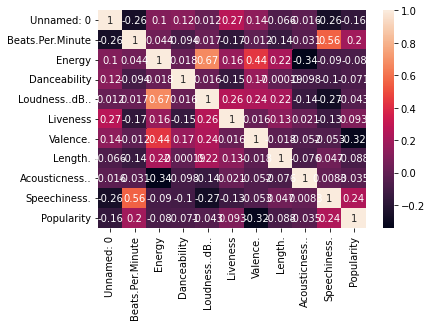

In [10]:
#heatmap is generally used to show the correalation between diffrent attributes of the dataset
 #annot,If True, write the data value in each cell.
 #corr is used to show the corelations between the columns 
sns.heatmap(song_data.corr(),annot=True)

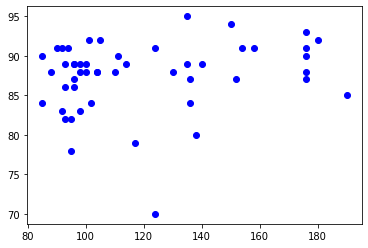

In [11]:
#plotting between Beats.per>Minutr and Popularity 
plt.scatter(song_data['Beats.Per.Minute'], song_data['Popularity'],color='b')

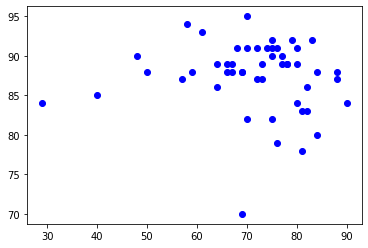

In [12]:
#plotting between Danceability and Popularity 
plt.scatter(song_data['Danceability'], song_data['Popularity'],color='b')

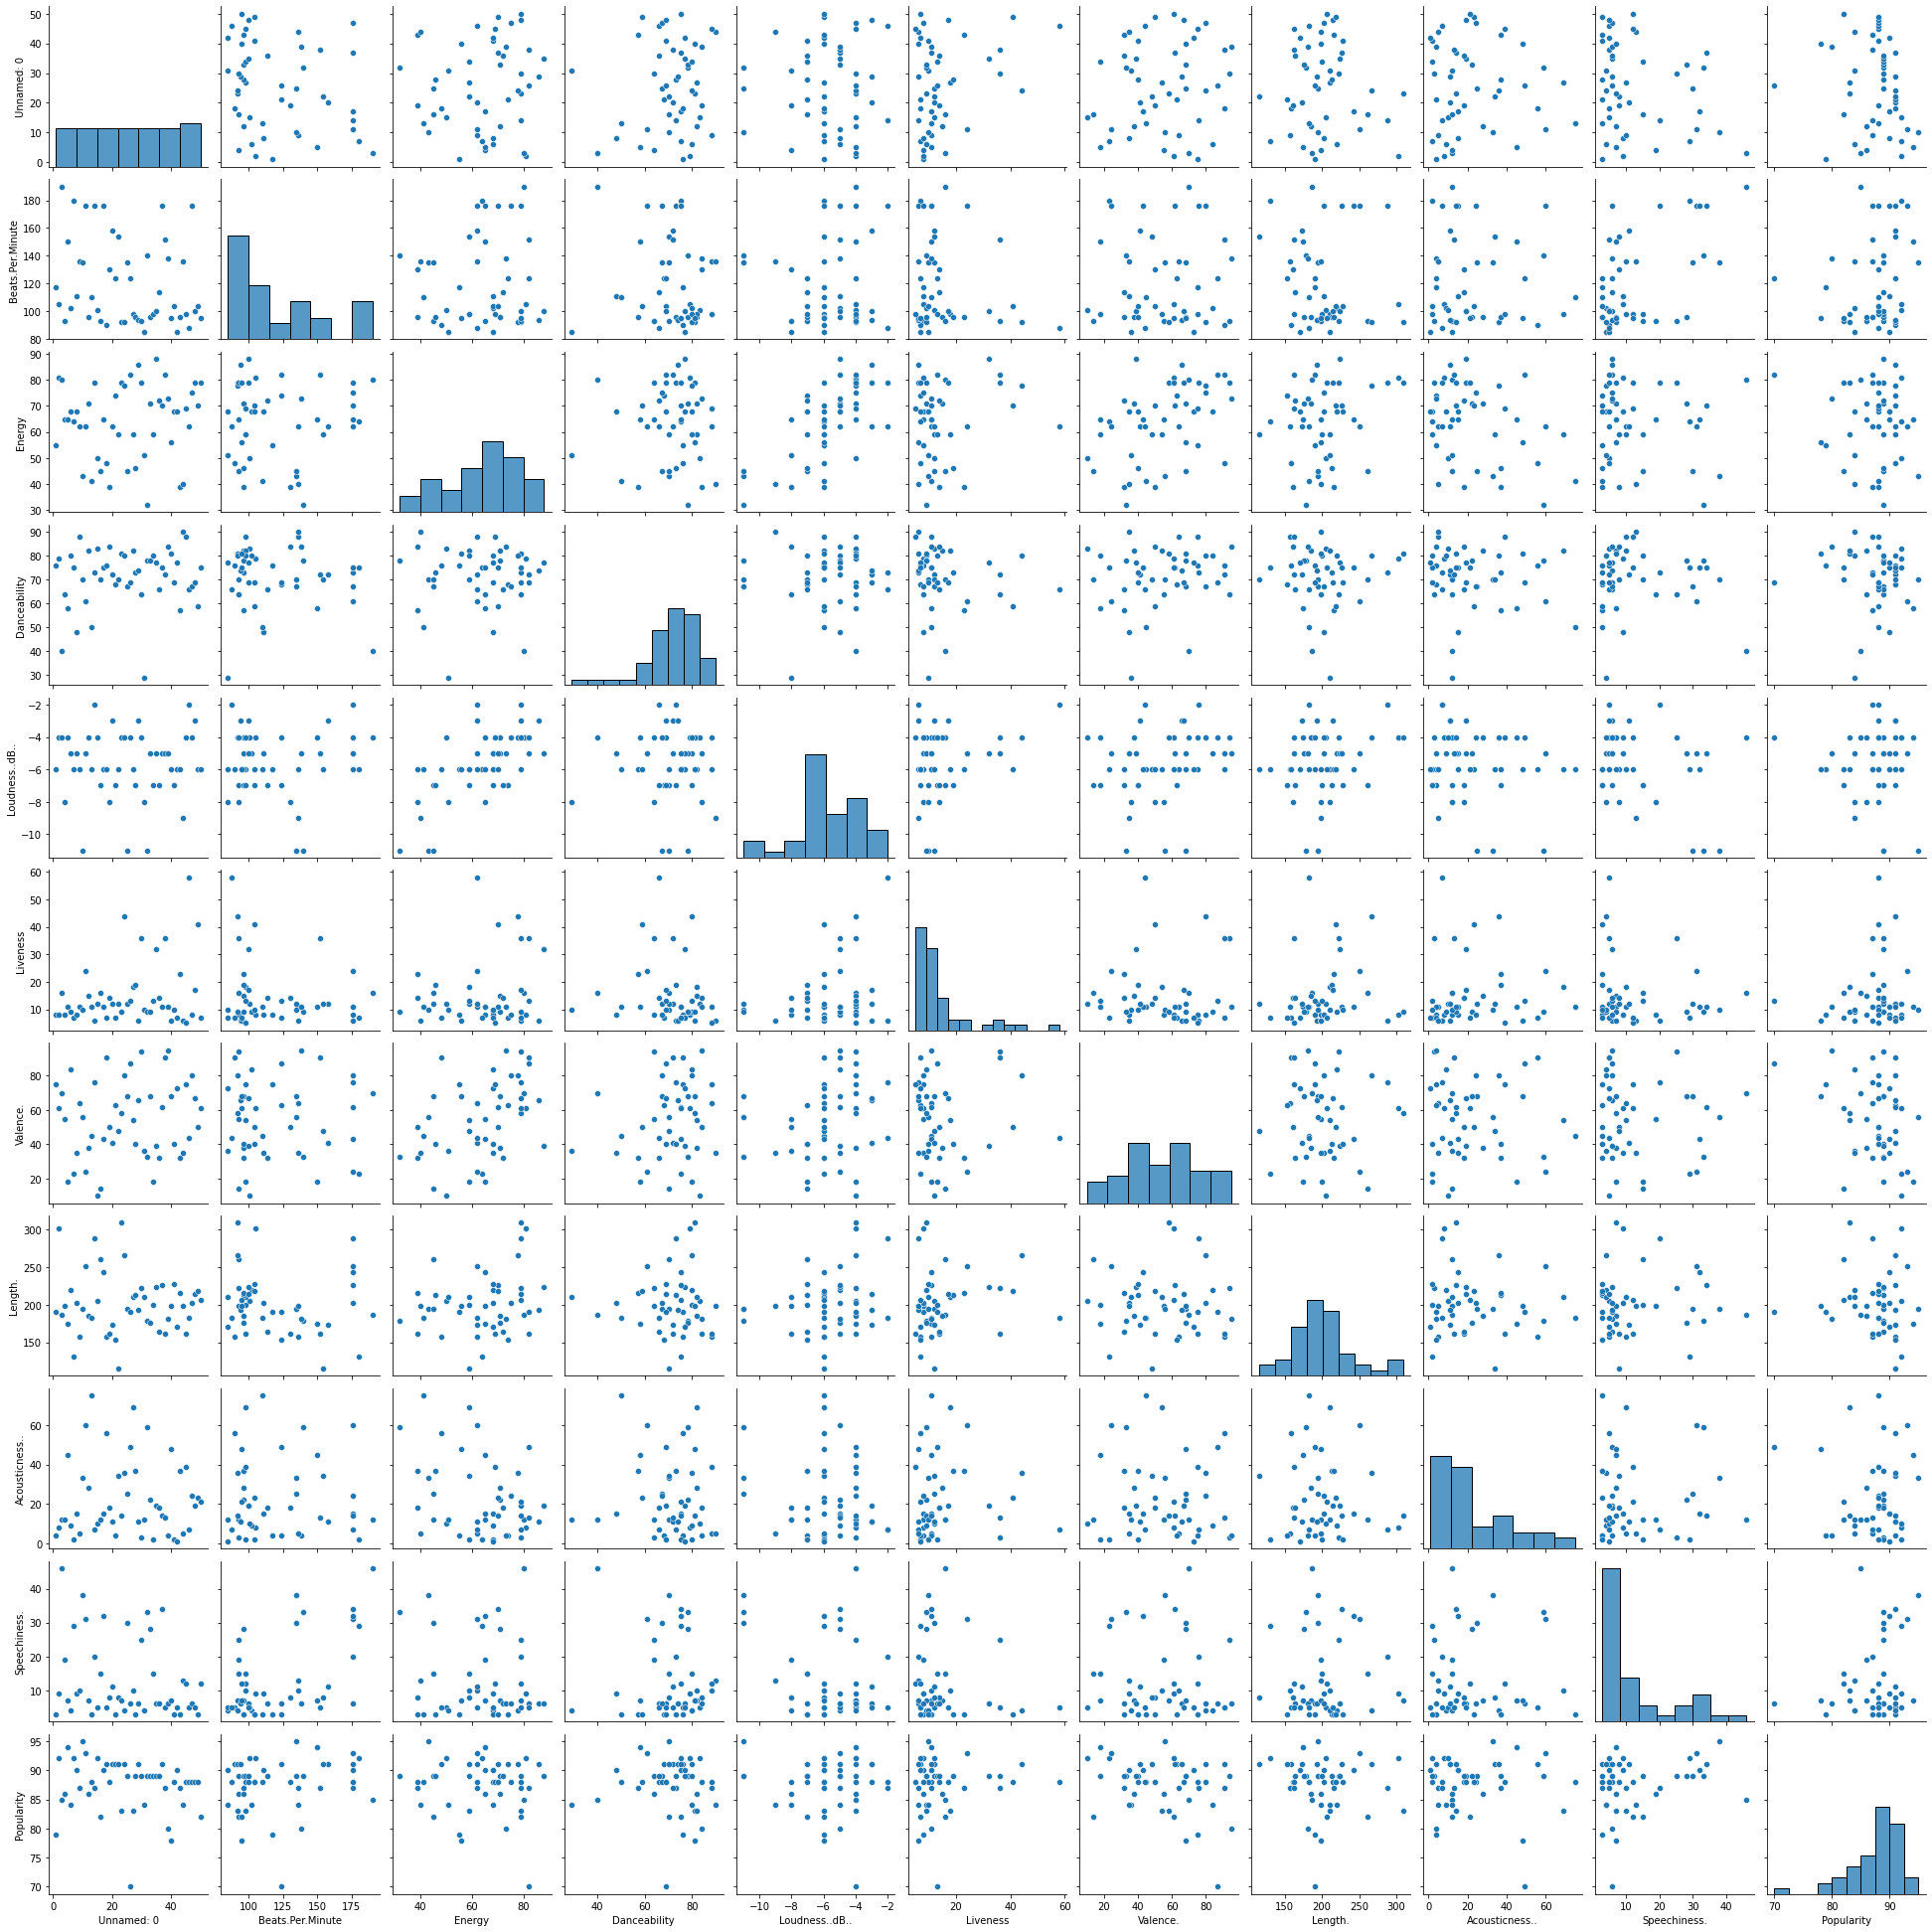

In [13]:
sns.pairplot(song_data) # plots all the data in the data fied in tha dataset 

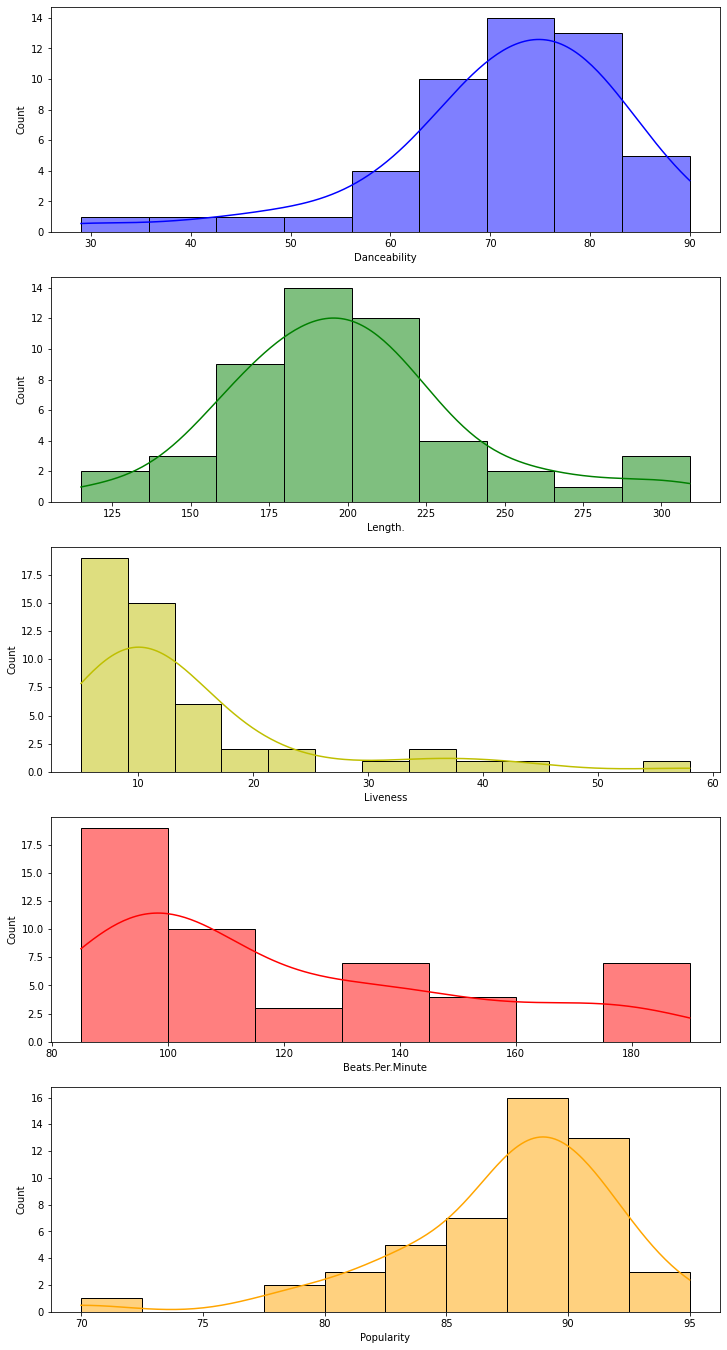

In [14]:
f, ax = plt.subplots(5, figsize=(12,24))
sns.histplot(song_data.Danceability,color='b',ax=ax[0], kde=True)
sns.histplot(song_data['Length.'],color='g',ax=ax[1], kde=True)
sns.histplot(song_data.Liveness,color='y',ax=ax[2], kde=True)
sns.histplot(song_data['Beats.Per.Minute'],color='r',ax=ax[3], kde=True)
sns.histplot(song_data['Popularity'],color='orange',ax=ax[4], kde=True)

##Regression Plot


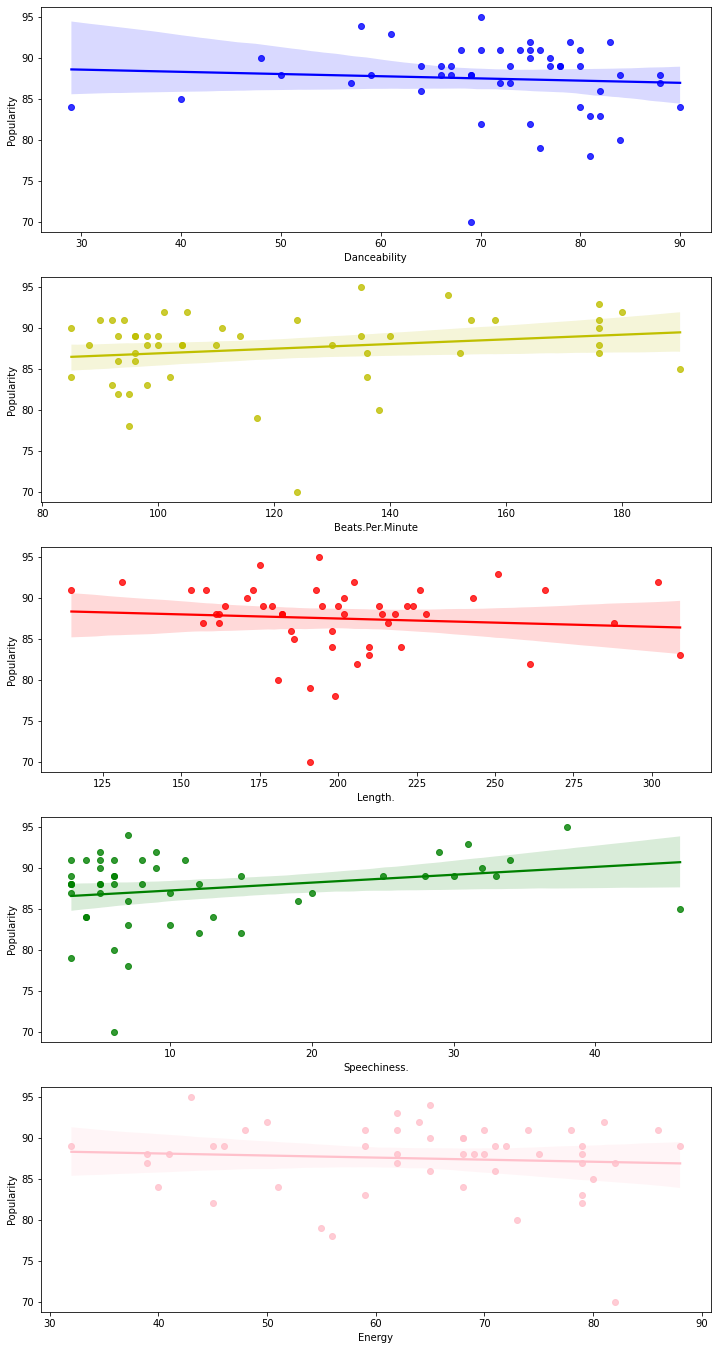

In [15]:
f, ax = plt.subplots(5, figsize=(12,24))
sns.regplot(x="Danceability", y="Popularity", data=song_data, color='b', ax=ax[0]);
sns.regplot(x="Beats.Per.Minute", y="Popularity", data=song_data, color='y', ax=ax[1]);
sns.regplot(x="Length.", y="Popularity", data=song_data, color='r', ax=ax[2]);
sns.regplot(x="Speechiness.", y="Popularity", data=song_data, color='g', ax=ax[3]);
sns.regplot(x="Energy", y="Popularity", data=song_data, color='pink', ax=ax[4]);

**Need to convert the Genre data to the numerical format**

In [16]:
#The Artistname and Genre have the String values so we need to convert them to numerical value 
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label


**Appending the numerical data to the dataset**

In [17]:
#song_data.drop("Genre", axis=1, inplace=True) song_data['Genre'] 'Artist.Name']
 
# Appending the array to our dataFrame
# with column name 'Purchased'
song_data["Genre"] = encode(song_data["Genre"])
song_data["Artist.Name"] =encode(song_data["Artist.Name"])
 
# printing Dataframe
song_data.head(5)

Unnamed: 0                       Track.Name  Artist.Name  Genre  \
0           1                         Se単orita           32      6   
1           2                            China            1     19   
2           3    boyfriend (with Social House)            2      8   
3           4  Beautiful People (feat. Khalid)            9     15   
4           5      Goodbyes (Feat. Young Thug)           28      9   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

#Linear Regression Algorithm : multi_features implementations

####Selecting Features:Genre,Danceability

In [18]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[['Genre', 'Danceability']] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Genre  Danceability
0      6            76
1     19            79
2      8            40
3     15            64
4      9            58

In [19]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [20]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 2)
(40,)
(10, 2)
(10,)


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.10142370053873073

In [22]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([88.80629815, 87.70094617, 89.53047487, 90.43703867, 85.63134509,
       90.0558634 , 87.46709456, 88.37676875, 86.85828846, 86.50284545])

**Checking Mean Squared Error for Linear Regression**

In [23]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

20.995534197008244

In [24]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.582088409994753

####Selecting Features:Beats.Per.Minute,Length

In [25]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[["Length.", 'Beats.Per.Minute']] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Length.  Beats.Per.Minute
0      191               117
1      302               105
2      186               190
3      198                93
4      175               150

In [26]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [27]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 2)
(40,)
(10, 2)
(10,)


In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.023047216542893545

In [29]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([88.74097854, 87.90794331, 87.92461443, 86.79615908, 86.91637379,
       87.1643455 , 87.18636211, 87.39040229, 88.26364877, 87.52660265])

**Checking Mean Squared Error for Linear Regression**

In [30]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

14.462404626771633

In [31]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

3.802946834597038

####Selecting Features:Beats.Per.Minute,Danceability

In [32]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[["Danceability", 'Beats.Per.Minute']] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Danceability  Beats.Per.Minute
0            76               117
1            79               105
2            40               190
3            64                93
4            58               150

In [33]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [34]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 2)
(40,)
(10, 2)
(10,)


In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.024306473468108436

In [36]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([88.88653369, 87.85026402, 88.21206775, 87.09385477, 86.78291964,
       87.3315258 , 87.18551794, 87.03951008, 88.05338428, 87.57995733])

**Checking Mean Squared Error for Linear Regression**

In [37]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

15.278176485279019

In [38]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

3.908730802355033

####Selecting Features:Length.,Danceability

In [39]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[["Danceability", 'Length.']] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Danceability  Length.
0            76      191
1            79      302
2            40      186
3            64      198
4            58      175

In [40]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [41]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 2)
(40,)
(10, 2)
(10,)


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.001645426270307504

In [43]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([87.49997583, 87.56224924, 87.72885986, 87.21347527, 87.6066549 ,
       87.85780433, 87.44534471, 87.48237625, 87.57260878, 87.64820924])

**Checking Mean Squared Error for Linear Regression**

In [44]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

16.282846386106222

In [45]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.035200910252948

####Selecting Features:Artist.Name

In [46]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[["Artist.Name"]] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Artist.Name
0           32
1            1
2            2
3            9
4           28

In [47]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [48]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 1)
(40,)
(10, 1)
(10,)


In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.021818665234449974

In [50]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([86.7921506 , 88.38139374, 87.79278517, 87.96936774, 87.14531574,
       86.90987232, 87.73392431, 87.55734174, 86.96873317, 86.73328975])

**Checking Mean Squared Error for Linear Regression**

In [51]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

16.859659496743642

In [52]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.1060515701515055

####Selecting Features:Beats.Per.Minute,Danceability,Length. , Energy

In [53]:
#selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
  #     'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
    #   'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
#songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

selected_features = song_data[['Beats.Per.Minute','Length.','Energy','Danceability']] #feaures on which our predenction is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
selected_features.head()

Beats.Per.Minute  Length.  Energy  Danceability
0               117      191      55            76
1               105      302      81            79
2               190      186      80            40
3                93      198      65            64
4               150      175      65            58

In [54]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

In [55]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 4)
(40,)
(10, 4)
(10,)


In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.04554553583015586

In [57]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([88.83412583, 88.83901878, 89.43939639, 86.5991343 , 86.83137325,
       87.01834838, 87.07743711, 88.14350267, 88.08262154, 88.04079828])

**Checking Mean Squared Error for Linear Regression**

In [58]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

16.721017155553376

In [59]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.089134034921499

#Implementions using all the Features 

##Selecting all the features 

In [60]:
selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our Predictionn is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset


selected_features.head()

Genre  Beats.Per.Minute  Artist.Name  Energy  Danceability  Loudness..dB..  \
0      6               117           32      55            76              -6   
1     19               105            1      81            79              -4   
2      8               190            2      80            40              -4   
3     15                93            9      65            64              -8   
4      9               150           28      65            58              -4   

   Liveness  Valence.  Length.  Acousticness..  Speechiness.  
0         8        75      191               4             3  
1         8        61      302               8             9  
2        16        70      186              12            46  
3         8        55      198              12            19  
4        11        18      175              45             7

In [61]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

##Training-testing and Spliting Data 

In [62]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)


(40, 11)
(40,)
(10, 11)
(10,)


##Linear Regressions 

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.33778728690263937

In [64]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([89.53598092, 87.82482409, 93.20716767, 87.89386002, 92.52390409,
       88.81684335, 87.17769458, 87.03519111, 87.49572521, 85.83107876])

**Checking Mean Squared Error for Linear Regression**

In [65]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

22.395540380086537

In [66]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.7323926696848115

## Polynomial Regression

####Regression Using degree 2 

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

poly_predict= reg.predict(x_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

np.sqrt(mean_squared_error(y_test, poly_predict))

4.7323926696848115

####Regression Using degree 3
 

In [144]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=3, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

poly_predict= reg.predict(x_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

np.sqrt(mean_squared_error(y_test, poly_predict))

4.7323926696848115

####Regression Using degree 4

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

poly_predict= reg.predict(x_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

np.sqrt(mean_squared_error(y_test, poly_predict))

4.7323926696848115

####Regression Using degree 5

In [140]:

poly = PolynomialFeatures(degree=5, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

poly_predict= reg.predict(x_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

np.sqrt(mean_squared_error(y_test, poly_predict))

4.7323926696848115

##Random forest Regressor Algorithm

In [67]:
# Initialzing empty lists to append all model's name and corresponding name
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
Random_Forest.fit(x_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement

RandomForestRegressor()

In [68]:
y_predict = Random_Forest.predict(x_test.values)
#y_predict = Random_Forest.predict(x_test)

In [69]:
y_predict

array([88.66, 89.02, 87.09, 86.71, 88.17, 86.06, 88.85, 88.07, 88.27,
       87.29])

**Checking Mean Squared Error for Random Forest Regressor**

In [70]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_predict)

13.486510000000013

In [71]:
np.sqrt(mean_squared_error(y_test, y_predict))

3.6723983988668785

##Decision Tree Algorithm

In [72]:
from sklearn.tree import DecisionTreeRegressor 
Decision_tree = DecisionTreeRegressor(random_state = 0)
Decision_tree.fit(x_train.values,y_train.values)

DecisionTreeRegressor(random_state=0)

In [73]:
dec_predict =Decision_tree.predict(x_test.values)
dec_predict

array([90., 88., 90., 82., 86., 90., 90., 90., 90., 87.])

**Checking Mean Squared Error for Decision tree**

In [74]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, dec_predict)

13.5

In [75]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.7323926696848115

## SVM Algorithm

In [76]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(x_train.values,y_train.values)
svm_predict=svm.predict(x_test.values)
svm_predict


array([89.07468613, 89.15439134, 88.73907464, 89.06177385, 88.70563782,
       88.39912968, 88.41224143, 88.51348833, 89.22516178, 88.12090714])

**Checking Mean Squared Error for SVM Model**

In [77]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, svm_predict)

17.00154704743329

In [78]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.7323926696848115

##Gaussian Regression

In [79]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gau = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x_train, y_train)

In [80]:
#gpr.score(x_test,y_test)
gaussian_predict= gau.predict(x_test)
gaussian_predict

array([89.63145496, 88.02490909, 93.29207443, 88.01520337, 92.02308953,
       88.59599428, 87.36930156, 86.72034601, 87.39423847, 85.83890782])

In [81]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, gaussian_predict)

22.33011288622243

In [82]:
np.sqrt(mean_squared_error(y_test, gaussian_predict))

4.725474884730891

##Lasso Regression

In [83]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1) #max_iter --> The maximum number of iterations, alphafloat:->default=1.0
#Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float, tol:--> The tolerance for the optimization
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [84]:
lasso_predict= lasso_reg.predict(x_test)
lasso_predict

array([87.575, 87.575, 87.575, 87.575, 87.575, 87.575, 87.575, 87.575,
       87.575, 87.575])

In [85]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, lasso_predict)

16.300625000000004

In [86]:
np.sqrt(mean_squared_error(y_test, lasso_predict))

4.0374032496147825

##Ridge Regression


In [87]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=1.0)
ridge.fit(x_train, y_train)


Ridge()

In [88]:
ridge_predict=ridge.predict(x_test)

In [89]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, ridge_predict)

22.384730851793183

In [90]:
np.sqrt(mean_squared_error(y_test, ridge_predict))

4.731250453293842

## Bayesian Ridge Regression

In [91]:
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()
BayReg.fit(x_train, y_train)
bayesian_predict=ridge.predict(x_test)

In [92]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, bayesian_predict)

22.384730851793183

In [93]:
np.sqrt(mean_squared_error(y_test, bayesian_predict))

4.731250453293842

## Kernel Ridge Regression 

In [94]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
kerReg = sklearn.kernel_ridge.KernelRidge(alpha=1,kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)
kerReg.fit(x_train,y_train)
ker_predict = reg.predict(x_test)

In [95]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, bayesian_predict)

22.384730851793183

In [96]:
np.sqrt(mean_squared_error(y_test, bayesian_predict))

4.731250453293842

##User Input


**Input from the user to predict Popularity using Random Forest**

In [146]:
Artist = str(input("Enter the Artist.Name: "))
genre = str(input("Enter the Genre: "))
arr=[Artist,genre] #need to convert strings to numerical value 
A = encode(arr)
Beats = int(input("Enter the Beats.Per.Minute: "))
Energy = int(input("Enter the Energy: "))
Danceability = int(input("Enter the Danceability"))
Loudness = int(input("Enter the Loudness; "))
Liveness = int(input("Enter the Liveness: "))
Valence = int(input("Enter the Valence: "))
Length = int(input("Enter the Length: "))
Acousticness = int(input("Enter the Acousticness: "))
Speechiness = int(input("Enter the Speechiness: "))
data = np.array([[A[0],A[1],Beats,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]])
song_popularity =Random_Forest.predict(data)
print(song_popularity)
#Ed Sheeran	pop	102	68	80	-5	9	84	220	9	4	84

Enter the Artist.Name: Ed Sheeran
Enter the Genre: pop
Enter the Beats.Per.Minute: 102
Enter the Energy: 68
Enter the Danceability80
Enter the Loudness; -5
Enter the Liveness: 9
Enter the Valence: 84
Enter the Length: 220
Enter the Acousticness: 9
Enter the Speechiness: 4
[85.46]
